In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Cargar datos
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar: escala de 0-255 a 0-1
X = np.concatenate((X_train, X_test)) / 255.0
y = np.concatenate((y_train, y_test))

# Cambiar dimensión para CNN: (n_samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# Convertir etiquetas a one-hot más adelante


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
def crear_modelo():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 clases
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n📁 Fold {fold + 1}")
    
    # Separar conjuntos
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # One-hot encoding
    y_train_cat = to_categorical(y_train_fold, num_classes=10)
    y_val_cat = to_categorical(y_val_fold, num_classes=10)

    # Crear y entrenar el modelo
    model = crear_modelo()
    model.fit(X_train_fold, y_train_cat, epochs=10, batch_size=64, verbose=1, validation_data=(X_val_fold, y_val_cat))

    # Evaluar
    y_pred = np.argmax(model.predict(X_val_fold), axis=1)
    acc = accuracy_score(y_val_fold, y_pred)
    accuracies.append(acc)
    print(f"✅ Accuracy Fold {fold + 1}: {acc:.4f}")



📁 Fold 1


C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6921 - loss: 0.8560 - val_accuracy: 0.8575 - val_loss: 0.3966
Epoch 2/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8475 - loss: 0.4250 - val_accuracy: 0.8722 - val_loss: 0.3430
Epoch 3/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8682 - loss: 0.3654 - val_accuracy: 0.8858 - val_loss: 0.3132
Epoch 4/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8820 - loss: 0.3237 - val_accuracy: 0.8929 - val_loss: 0.2869
Epoch 5/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8911 - loss: 0.3051 - val_accuracy: 0.8960 - val_loss: 0.2832
Epoch 6/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8998 - loss: 0.2773 - val_accuracy: 0.9017 - val_loss: 0.2649
Epoch 7/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9056 - loss: 0.2636 - val_accuracy: 0.9049 - val_loss: 0.2599
Epoch 8/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9108 - loss: 0.2425 - 

C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.6817 - loss: 0.8981 - val_accuracy: 0.8537 - val_loss: 0.3982
Epoch 2/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8383 - loss: 0.4437 - val_accuracy: 0.8668 - val_loss: 0.3485
Epoch 3/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8595 - loss: 0.3847 - val_accuracy: 0.8857 - val_loss: 0.3093
Epoch 4/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8758 - loss: 0.3477 - val_accuracy: 0.8887 - val_loss: 0.2985
Epoch 5/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8862 - loss: 0.3192 - val_accuracy: 0.8957 - val_loss: 0.2805
Epoch 6/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8917 - loss: 0.2971 - val_accuracy: 0.9030 - val_loss: 0.2568
Epoch 7/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8995 - loss: 0.2716 - val_accuracy: 0.9066 - val_loss: 0.2538
Epoch 8/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9047 - loss: 0.2615 - 

C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.6817 - loss: 0.8894 - val_accuracy: 0.8485 - val_loss: 0.4023
Epoch 2/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8470 - loss: 0.4211 - val_accuracy: 0.8766 - val_loss: 0.3354
Epoch 3/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8706 - loss: 0.3651 - val_accuracy: 0.8876 - val_loss: 0.3033
Epoch 4/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8803 - loss: 0.3252 - val_accuracy: 0.8937 - val_loss: 0.2826
Epoch 5/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8895 - loss: 0.3010 - val_accuracy: 0.8992 - val_loss: 0.2698
Epoch 6/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8936 - loss: 0.2887 - val_accuracy: 0.9040 - val_loss: 0.2583
Epoch 7/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9066 - loss: 0.2554 - val_accuracy: 0.9070 - val_loss: 0.2504
Epoch 8/10
730/730 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9104 - loss: 0.2427 - 

In [5]:
print("\n📊 Accuracy por fold:")
for i, acc in enumerate(accuracies):
    print(f"Fold {i+1}: {acc:.4f}")
print(f"🔍 Promedio total: {np.mean(accuracies):.4f}")



📊 Accuracy por fold:
Fold 1: 0.9076
Fold 2: 0.9109
Fold 3: 0.9146
🔍 Promedio total: 0.9110


In [6]:
import os
import zipfile
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [7]:
# Ruta al archivo ZIP descargado desde Kaggle
zip_path = r"C:\Users\salga\Downloads\archive.zip"
# Ruta donde se extraerá el contenido
extract_path = r"C:\Users\salga\Downloads\GTSRB"

# Crear la carpeta si no existe
os.makedirs(extract_path, exist_ok=True)

# Extraer ZIP solo si no ha sido extraído antes
if not os.path.exists(os.path.join(extract_path, "Train.csv")):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ ZIP extraído correctamente.")
else:
    print("⚠️ ZIP ya estaba extraído. Continuando...")


✅ ZIP extraído correctamente.


In [11]:
IMG_SIZE = 64
BASE_DIR = r"C:\Users\salga\Downloads\GTSRB"  # ¡Confirmado!

train_df = pd.read_csv(os.path.join(BASE_DIR, "Train.csv"))

X = []
y = []

errores = 0

for _, row in train_df.iterrows():
    img_path = os.path.join(BASE_DIR, row["Path"])
    label = row["ClassId"]

    if not os.path.exists(img_path):
        print(f"❌ Imagen no encontrada: {img_path}")
        errores += 1
        continue

    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label)

X = np.array(X, dtype='float32') / 255.0
y = np.array(y)

print(f"\n✅ Total imágenes cargadas: {X.shape[0]}")
print(f"📏 Tamaño imágenes: {X.shape[1:]}")
print(f"🔢 Número de clases: {len(np.unique(y))}")
print(f"⚠️ Total errores al leer imágenes: {errores}")


❌ Imagen no encontrada: C:\Users\salga\Downloads\GTSRB\Train/10/00010_00002_00013.png

✅ Total imágenes cargadas: 39208
📏 Tamaño imágenes: (64, 64, 3)
🔢 Número de clases: 43
⚠️ Total errores al leer imágenes: 1


In [12]:
def crear_modelo_GTSRB(num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [13]:
num_classes = len(np.unique(y))
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n📁 Fold {fold + 1}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    y_train_cat = to_categorical(y_train, num_classes)
    y_val_cat = to_categorical(y_val, num_classes)

    model = crear_modelo_GTSRB(num_classes)
    model.fit(X_train, y_train_cat, epochs=15, batch_size=64, validation_data=(X_val, y_val_cat), verbose=1)

    y_pred = np.argmax(model.predict(X_val), axis=1)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"✅ Accuracy Fold {fold + 1}: {acc:.4f}")



📁 Fold 1


C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 58s 131ms/step - accuracy: 0.3917 - loss: 2.2872 - val_accuracy: 0.9314 - val_loss: 0.3244
Epoch 2/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 44s 107ms/step - accuracy: 0.8652 - loss: 0.4564 - val_accuracy: 0.9702 - val_loss: 0.1412
Epoch 3/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 45s 109ms/step - accuracy: 0.9230 - loss: 0.2606 - val_accuracy: 0.9747 - val_loss: 0.1017
Epoch 4/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 44s 106ms/step - accuracy: 0.9492 - loss: 0.1691 - val_accuracy: 0.9790 - val_loss: 0.0744
Epoch 5/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 45s 109ms/step - accuracy: 0.9599 - loss: 0.1403 - val_accuracy: 0.9869 - val_loss: 0.0568
Epoch 6/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 43s 104ms/step - accuracy: 0.9665 - loss: 0.1051 - val_accuracy: 0.9855 - val_loss: 0.0563
Epoch 7/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.9729 - loss: 0.0914 - val_accuracy: 0.9860 - val_loss: 0.0522
Epoch 8/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.9731 - loss: 0.0

C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.3633 - loss: 2.4035 - val_accuracy: 0.9007 - val_loss: 0.4081
Epoch 2/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.8439 - loss: 0.5260 - val_accuracy: 0.9575 - val_loss: 0.1885
Epoch 3/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9113 - loss: 0.2965 - val_accuracy: 0.9721 - val_loss: 0.1141
Epoch 4/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.9366 - loss: 0.2100 - val_accuracy: 0.9759 - val_loss: 0.0991
Epoch 5/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.9520 - loss: 0.1628 - val_accuracy: 0.9823 - val_loss: 0.0742
Epoch 6/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9576 - loss: 0.1395 - val_accuracy: 0.9848 - val_loss: 0.0637
Epoch 7/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.9648 - loss: 0.1130 - val_accuracy: 0.9832 - val_loss: 0.0684
Epoch 8/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.9649 - loss: 0.1119 - 

C:\Users\salga\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.3516 - loss: 2.4660 - val_accuracy: 0.8910 - val_loss: 0.4330
Epoch 2/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.8342 - loss: 0.5476 - val_accuracy: 0.9537 - val_loss: 0.2007
Epoch 3/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.8974 - loss: 0.3352 - val_accuracy: 0.9693 - val_loss: 0.1308
Epoch 4/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.9256 - loss: 0.2534 - val_accuracy: 0.9757 - val_loss: 0.1086
Epoch 5/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9363 - loss: 0.2002 - val_accuracy: 0.9758 - val_loss: 0.1158
Epoch 6/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.9461 - loss: 0.1728 - val_accuracy: 0.9799 - val_loss: 0.0873
Epoch 7/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 34s 84ms/step - accuracy: 0.9558 - loss: 0.1450 - val_accuracy: 0.9844 - val_loss: 0.0706
Epoch 8/15
409/409 ━━━━━━━━━━━━━━━━━━━━ 35s 85ms/step - accuracy: 0.9598 - loss: 0.1216 -

In [14]:
print("\n📊 Accuracy por fold:")
for i, acc in enumerate(accuracies):
    print(f"Fold {i+1}: {acc:.4f}")
print(f"🔍 Promedio total: {np.mean(accuracies):.4f}")



📊 Accuracy por fold:
Fold 1: 0.9924
Fold 2: 0.9904
Fold 3: 0.9898
🔍 Promedio total: 0.9909


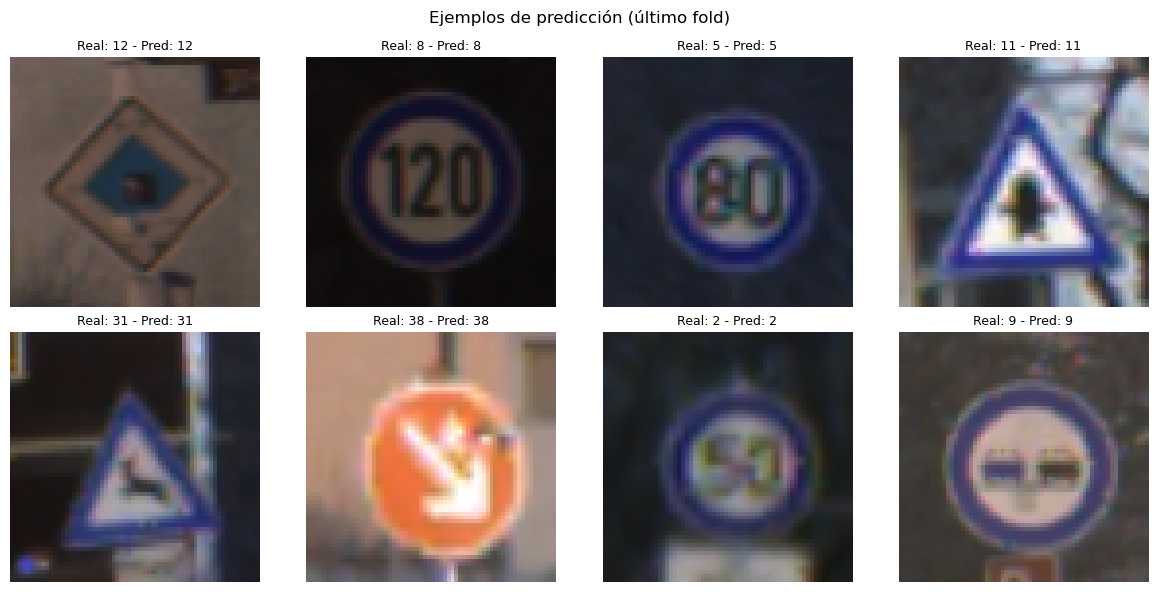

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
fig.suptitle("Ejemplos de predicción (último fold)")

random_idxs = random.sample(range(len(X_val)), 8)
for i, idx in enumerate(random_idxs):
    ax = axs[i // 4, i % 4]
    img = X_val[idx]
    true_label = y_val[idx]
    pred_label = y_pred[idx]
    ax.imshow(img)
    ax.set_title(f"Real: {true_label} - Pred: {pred_label}", fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()


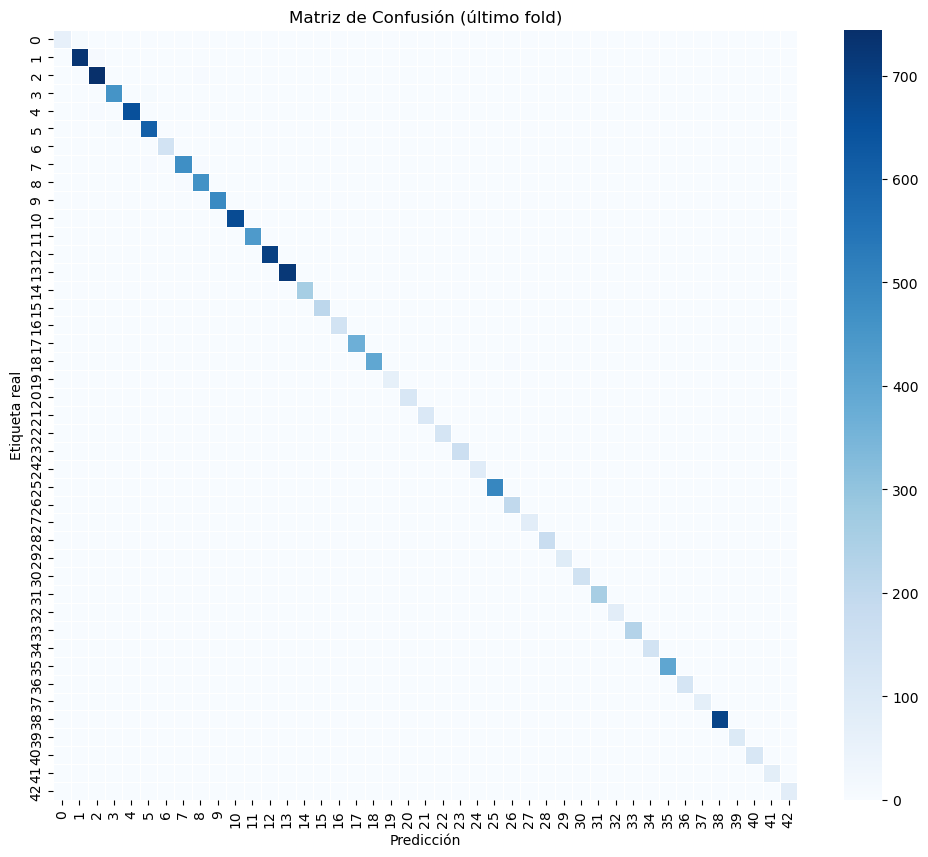

In [16]:
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", linewidths=0.5)
plt.title("Matriz de Confusión (último fold)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()
